# HW0 - Turn your favorite photo a rotating video
**Total Points: 100**

**Assignment Due: Sep 11th Thursday 11:59 PM EST**

In this assignment, you will:
- Implement rotation using **forward mapping** (origin & arbitrary center)
- Implement rotation using **inverse mapping** (origin & arbitrary center)
- Animate your image rotating and export as an MP4 video

Please submit the following files on Canvas:
- The original .ipynb notebook
- A PDF version of the .ipynb notebook
- rotation.mp4
- rotating_favorite_video.mp4
- rotating_favorite_creative_video.mp4

Allowed libraries: **numpy, matplotlib (plt), imageio, opencv-python (cv2)**

In [1]:
!pip install numpy matplotlib imageio opencv-python

Use `imageio.imread` to load the sample image.

/tmp/ipython-input-3604052135.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('Lenna.png')


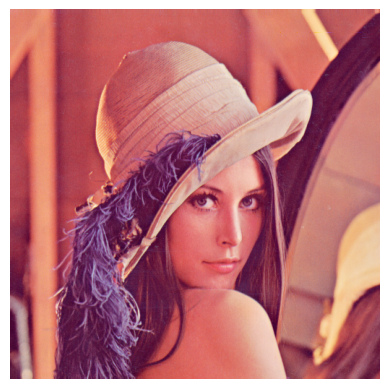

In [2]:
import imageio
import matplotlib.pyplot as plt

img = imageio.imread('Lenna.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## Part A. Forward Mapping (30 points)
### Explanation
- **Equation:**
$$
x_d = R(\theta)\,x_s
$$

where

$$
R(\theta) =
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$

- **Insight:** *Where will the pixel land in the destination? (Throwing pixels forward).*

- **Pseudocode:**
```python
for each pixel (x_s, y_s) in source:
    [x_d, y_d] = R(theta) * [x_s, y_s]
    put source(x_s, y_s) into destination(round(x_d), round(y_d))
```

### Q1-1. Implement `forward_mapping_origin` (15 points)
Write a function that rotates around the origin using forward mapping.

In [3]:
# Some stuff that is commented out was very slow during video
# generation, switched to vectorized operations on all tasks
# for faster execution

In [4]:
# import numpy as np

# def forward_mapping_origin(img, theta_deg):
#     # TODO: Implement forward mapping around origin
#     theta_rad = np.deg2rad(theta_deg)
#     src_h, src_w = img.shape[:2]
#     dst_h = src_h
#     dst_w = src_w

#     out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

#     # YOUR CODE HERE
#     for c in range(img.shape[2]):
#       for x_s in range(src_w):
#           for y_s in range(src_h):
#             cur = np.array([x_s, y_s])
#             R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
#                           [np.sin(theta_rad), np.cos(theta_rad)]])

#             dest = (R @ cur).astype(int)
#             x_d, y_d = dest[0], dest[1]

#             if 0 <= x_d < dst_w and 0 <= y_d < dst_h:
#               out[y_d, x_d, c] = img[y_s, x_s, c]

#     return out

In [5]:
import numpy as np

def forward_mapping_origin(img, theta_deg):
    # TODO: Implement forward mapping around origin
    theta_rad = np.deg2rad(theta_deg)
    src_h, src_w = img.shape[:2]
    dst_h = src_h
    dst_w = src_w

    out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

    # YOUR CODE HERE
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad),  np.cos(theta_rad)]])

    ys, xs = np.indices((src_h, src_w))
    coords = np.stack([xs.ravel(), ys.ravel()], axis=-1)  # shape (N, 2)

    # vectorized rotate
    dest = (coords @ R.T).round().astype(int)
    xd, yd = dest[:, 0], dest[:, 1]


    mask = (0 <= xd) & (xd < dst_w) & (0 <= yd) & (yd < dst_h)
    out[yd[mask], xd[mask]] = img[coords[mask, 1], coords[mask, 0]]

    return out


### Q1-2. Rotate by 30 degrees and display (5 points)
The image should look like it is rotated by -30 degree because in a Numpy array, the y-axis increases downward, whereas in Cartesian coordinates, the y-axis increases upward.

The expected output looks as follows:

/tmp/ipython-input-188146722.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  expected_output = imageio.imread('HW0_Q1_2_expected_output.png')


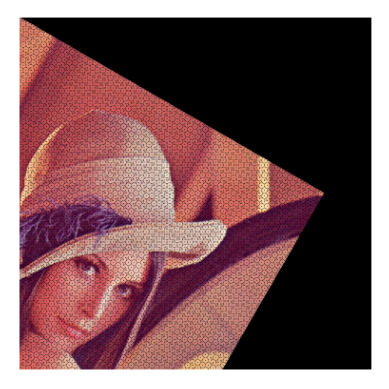

In [6]:
expected_output = imageio.imread('HW0_Q1_2_expected_output.png')
plt.imshow(expected_output)
plt.axis('off')
plt.show()

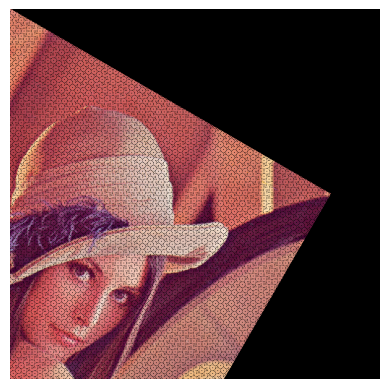

In [7]:
# Plot the output here.
rotated = forward_mapping_origin(img, 30)
plt.imshow(rotated)
plt.axis('off')
plt.show()

### Q1-3. Implement rotation around arbitrary coordinate (15 points)
Hint: shift coordinates so that the chosen point is treated as the origin before rotation.

In [8]:
# def forward_mapping_arbitrary(img, theta_deg, cx, cy):
#     # TODO: Implement forward mapping around arbitrary point (cx, cy)
#     theta_rad = np.deg2rad(theta_deg)
#     src_h, src_w = img.shape[:2]
#     dst_h = src_h
#     dst_w = src_w


#     out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

#     # YOUR CODE HERE
#     for c in range(img.shape[2]):
#       for x_s in range(src_w):
#           for y_s in range(src_h):
#             cur = np.array([x_s, y_s])
#             R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
#                           [np.sin(theta_rad), np.cos(theta_rad)]])

#             dest = (R @ (cur - np.array([cx, cy])) + np.array([cx, cy])).astype(int)
#             x_d, y_d = dest[0], dest[1]

#             if 0 <= x_d < dst_w and 0 <= y_d < dst_h:
#               out[y_d, x_d, c] = img[y_s, x_s, c]

#     return out

In [9]:
import numpy as np

def forward_mapping_arbitrary(img, theta_deg, cx, cy):
    # TODO: Implement forward mapping around arbitrary point (cx, cy)
    theta_rad = np.deg2rad(theta_deg)
    src_h, src_w = img.shape[:2]
    dst_h = src_h
    dst_w = src_w

    out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

    # YOUR CODE HERE
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad),  np.cos(theta_rad)]])

    ys, xs = np.indices((src_h, src_w))
    coords = np.stack([xs.ravel(), ys.ravel()], axis=-1)  # shape (N, 2)

    # vectorized rotate around (cx, cy)
    dest = ((coords - np.array([cx, cy])) @ R.T + np.array([cx, cy])).round().astype(int)
    xd, yd = dest[:, 0], dest[:, 1]

    mask = (0 <= xd) & (xd < dst_w) & (0 <= yd) & (yd < dst_h)
    out[yd[mask], xd[mask]] = img[coords[mask, 1], coords[mask, 0]]

    return out


### Q1-4. Rotate with center (x=256, y=256), θ=30° and display (5 points)

The expected output looks as follows:

/tmp/ipython-input-107794347.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  expected_output = imageio.imread('HW0_Q1_4_expected_output.png')


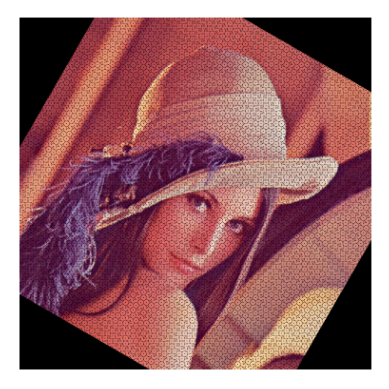

In [10]:
expected_output = imageio.imread('HW0_Q1_4_expected_output.png')
plt.imshow(expected_output)
plt.axis('off')
plt.show()

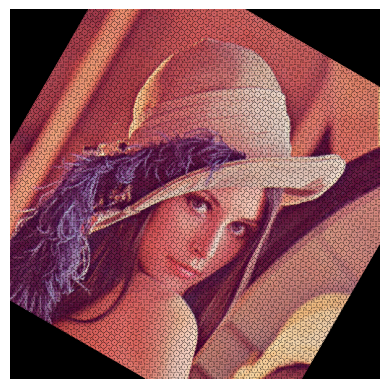

In [11]:
# Plot the output here.
rotated = forward_mapping_arbitrary(img, 30, 256, 256)
plt.imshow(rotated)
plt.axis('off')
plt.show()

**Problems with forward mapping**: holes (gap in the image) - they appear because some destination pixels are not assigned a value when multiple source pixels map to the same location or when no source pixel maps to a destination pixel. That is why we use **inverse mapping**.

## Part B. Inverse Mapping (30 points)
### Explanation
- **Equation:**
$$
x_s = R(-\theta)\,x_d
$$

where

$$
R(-\theta) =
\begin{bmatrix}
\cos\theta & \sin\theta \\
-\sin\theta & \cos\theta
\end{bmatrix}
$$

- **Insight:** *Walk over each destination pixel and ask: where should I pull the color from in the source?*

- **Pseudocode:**
```python
for each pixel (x_d, y_d) in destination:
    [x_s, y_s] = R(-theta) * [x_d, y_d]
    destination(x_d, y_d) = sample_from_source(x_s, y_s)
```

### Q2-1. Implement `inverse_mapping_origin` (15 points)

In [12]:
# def inverse_mapping_origin(img, theta_deg):
#     # TODO: Implement inverse mapping rotation around origin
#     theta_rad = np.deg2rad(theta_deg)
#     src_h, src_w = img.shape[:2]
#     dst_h = src_h
#     dst_w = src_w

#     out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

#     # YOUR CODE HERE
#     for c in range(img.shape[2]):
#       for x_d in range(dst_w):
#           for y_d in range(dst_h):
#             cur = np.array([x_d, y_d])
#             R = np.array([[np.cos(theta_rad), np.sin(theta_rad)],
#                           [-np.sin(theta_rad), np.cos(theta_rad)]])

#             dest = (R @ cur).astype(int)
#             x_s, y_s = dest[0], dest[1]

#             if 0 <= x_s < src_w and 0 <= y_s < src_h:
#               out[y_d, x_d, c] = img[y_s, x_s, c]

#     return out

In [13]:
import numpy as np

def inverse_mapping_origin(img, theta_deg):
    # TODO: Implement inverse mapping rotation around origin
    theta_rad = np.deg2rad(theta_deg)
    src_h, src_w = img.shape[:2]
    dst_h = src_h
    dst_w = src_w

    out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

    # YOUR CODE HERE
    R = np.array([[np.cos(theta_rad), np.sin(theta_rad)],
                  [-np.sin(theta_rad), np.cos(theta_rad)]])

    ys, xs = np.indices((dst_h, dst_w))
    coords = np.stack([xs.ravel(), ys.ravel()], axis=-1)  # shape (N, 2)

    # vectorized inverse rotate
    dest = (coords @ R.T).round().astype(int)
    xs_s, ys_s = dest[:, 0], dest[:, 1]

    mask = (0 <= xs_s) & (xs_s < src_w) & (0 <= ys_s) & (ys_s < src_h)
    out[coords[mask, 1], coords[mask, 0]] = img[ys_s[mask], xs_s[mask]]

    return out


### Q2-2. Display rotation (θ=30°) (5 points)

The expected output looks as follows:

/tmp/ipython-input-4232865078.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  expected_output = imageio.imread('HW0_Q2_2_expected_output.png')


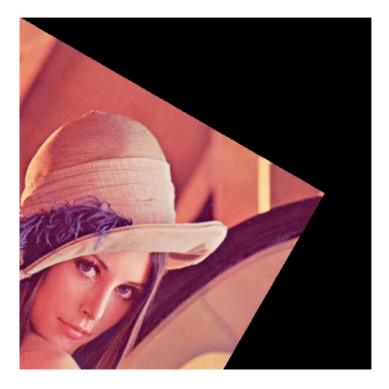

In [14]:
expected_output = imageio.imread('HW0_Q2_2_expected_output.png')
plt.imshow(expected_output)
plt.axis('off')
plt.show()

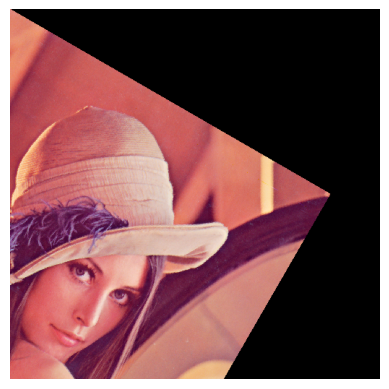

In [15]:
# Plot the output here.
rotated = inverse_mapping_origin(img, 30)
plt.imshow(rotated)
plt.axis('off')
plt.show()

### Q2-3. Implement rotation around arbitrary center (15 points)

In [16]:
# def inverse_mapping_arbitrary(img, theta_deg, cx, cy):
#     # TODO: Implement inverse mapping around arbitrary point (cx, cy)
#     theta_rad = np.deg2rad(theta_deg)
#     src_h, src_w = img.shape[:2]
#     dst_h = src_h
#     dst_w = src_w

#     out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

#     # YOUR CODE HERE
#     for c in range(img.shape[2]):
#       for x_d in range(dst_w):
#           for y_d in range(dst_h):
#             cur = np.array([x_d, y_d])
#             R = np.array([[np.cos(theta_rad), np.sin(theta_rad)],
#                           [-np.sin(theta_rad), np.cos(theta_rad)]])

#             dest = (R @ (cur - np.array([cx, cy])) + np.array([cx, cy])).astype(int)
#             x_s, y_s = dest[0], dest[1]

#             if 0 <= x_s < src_w and 0 <= y_s < src_h:
#               out[y_d, x_d, c] = img[y_s, x_s, c]

#     return out

In [17]:
import numpy as np

def inverse_mapping_arbitrary(img, theta_deg, cx, cy):
    # TODO: Implement inverse mapping around arbitrary point (cx, cy)
    theta_rad = np.deg2rad(theta_deg)
    src_h, src_w = img.shape[:2]
    dst_h = src_h
    dst_w = src_w

    out = np.zeros((dst_h, dst_w,3),dtype=np.uint8)

    # YOUR CODE HERE
    R = np.array([[np.cos(theta_rad), np.sin(theta_rad)],
                  [-np.sin(theta_rad), np.cos(theta_rad)]])

    ys, xs = np.indices((dst_h, dst_w))
    coords = np.stack([xs.ravel(), ys.ravel()], axis=-1)  # shape (N, 2)

    # vectorized inverse rotate around (cx, cy)
    dest = ((coords - np.array([cx, cy])) @ R.T + np.array([cx, cy])).round().astype(int)
    xs_s, ys_s = dest[:, 0], dest[:, 1]

    mask = (0 <= xs_s) & (xs_s < src_w) & (0 <= ys_s) & (ys_s < src_h)
    out[coords[mask, 1], coords[mask, 0]] = img[ys_s[mask], xs_s[mask]]

    return out


### Q2-4. Display result (x=256, y=256, θ=30°) (5 points)

The expected output looks as follows:

/tmp/ipython-input-431391595.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  expected_output = imageio.imread('HW0_Q2_4_expected_output.png')


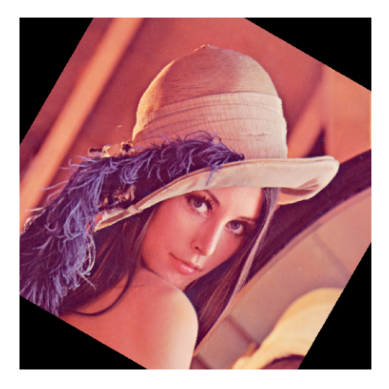

In [18]:
expected_output = imageio.imread('HW0_Q2_4_expected_output.png')
plt.imshow(expected_output)
plt.axis('off')
plt.show()

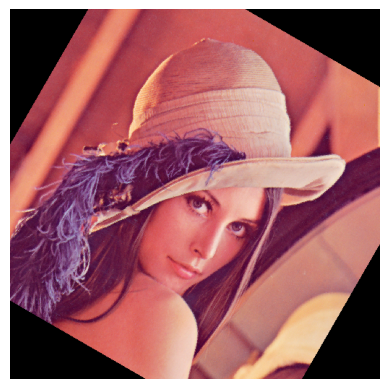

In [19]:
# Plot the output here
rotated = inverse_mapping_arbitrary(img, 30, 256, 256)
plt.imshow(rotated)
plt.axis('off')
plt.show()

## Part C. Animation (40 points)
### Q3-1. Rotation animation (15 points)
Implement a function to rotate the image continuously around the center and save as an MP4.

In [20]:
import cv2

def make_rotation_video(img, seconds=3, fps=24, out_file='rotation.mp4'):
    h, w = img.shape[:2]
    center = (w//2, h//2)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(out_file, fourcc, fps, (w, h))

    # YOUR CODE HERE
    N = fps * seconds

    for t in range(N):

        theta = 360 * t / N

        frame = inverse_mapping_arbitrary(img, theta, *center)
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        writer.write(frame_bgr)
    writer.release()


make_rotation_video(img, seconds=3, fps=24)

### Q3-2. Turn Your Favorite Photo a Rotatinv Video  (10 points)


In [21]:
# Load your own favorite photo
favorite_photo = imageio.imread('f40_wheel.jpg')
make_rotation_video(favorite_photo, seconds=3, fps=24, out_file='rotating_favorite_photo.mp4')

/tmp/ipython-input-2606092892.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  favorite_photo = imageio.imread('f40_wheel.jpg')


### Q3-3. Creative Animation (15 points)
Create your own fun animation ('rotating_favorite_photo_creative.mp4'). For example:
- Image flying out of frame
- Zoom in/out while rotating
- Add trails or effects
Be creative!

In [22]:
import numpy as np

def spiral_inverse_mapping_arbitrary(img, theta_deg, cx, cy, spiral_factor=0.05):
    theta_rad_base = np.deg2rad(theta_deg)
    src_h, src_w = img.shape[:2]
    dst_h = src_h
    dst_w = src_w

    out = np.zeros((dst_h, dst_w,3), dtype=np.uint8)

    ys, xs = np.indices((dst_h, dst_w))
    coords = np.stack([xs.ravel(), ys.ravel()], axis=-1)  # shape (N, 2)

    # spiral angle setup based on radius
    dists = np.linalg.norm(coords - np.array([cx, cy]), axis=1)
    thetas = theta_rad_base + spiral_factor * dists

    # compute rotation for each pixel
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)

    # vectorized rotation
    dx = coords[:, 0] - cx
    dy = coords[:, 1] - cy

    xs_s = (cos_t * dx + sin_t * dy + cx).round().astype(int)
    ys_s = (-sin_t * dx + cos_t * dy + cy).round().astype(int)

    mask = (0 <= xs_s) & (xs_s < src_w) & (0 <= ys_s) & (ys_s < src_h)
    out[coords[mask, 1], coords[mask, 0]] = img[ys_s[mask], xs_s[mask]]

    return out


In [23]:
import cv2

def make_rotation_spiral_video(img, seconds=3, fps=24,
                               spiral_factor=0.05, out_file='rotating_favorite_photo_creative.mp4'):

    h, w = img.shape[:2]
    center = (w//2, h//2)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(out_file, fourcc, fps, (w, h))

    # YOUR CODE HERE
    N = fps * seconds

    for t in range(N):

        theta = 360 * t / N

        frame = spiral_inverse_mapping_arbitrary(img, theta, *center,
                                                 spiral_factor=spiral_factor * t / (2*N))
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        writer.write(frame_bgr)
    writer.release()


make_rotation_spiral_video(img, seconds=3, fps=24)

In [39]:
!apt-get update -qq
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc
!apt-get install -y pandoc
!pip install nbconvert

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive

In [40]:
!jupyter nbconvert --to pdf "HW0(2).ipynb"

[NbConvertApp] Converting notebook HW0(2).ipynb to pdf
[NbConvertApp] Support files will be in HW0(2)_files/
[NbConvertApp] Making directory ./HW0(2)_files
[NbConvertApp] Writing 84042 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1978178 bytes to HW0(2).pdf
